# Artificial Neural Networks with Keras

# Setup

Firstly, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20 and TensorFlow ≥2.0.

In [1]:
# TensorFlow ≥2.0 is required
import tensorflow as tf

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Building an Image Classifier

First let's import TensorFlow and Keras.

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
tf.__version__

'2.8.0'

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in `keras.datasets`. The dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set:

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

The training set contains 60,000 grayscale images, each 28x28 pixels:

In [5]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [6]:
X_train_full.dtype

dtype('uint8')

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [7]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

You can plot an image using Matplotlib's `imshow()` function, with a `'binary'`
 color map:

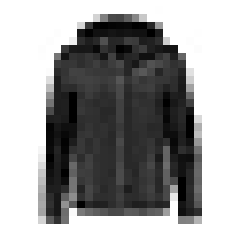

In [8]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [9]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Here are the corresponding class names:

In [10]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

So the first image in the training set is a coat:

In [11]:
class_names[y_train[0]]

'Coat'

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [12]:
X_valid.shape

(5000, 28, 28)

In [13]:
X_test.shape

(10000, 28, 28)

Let's take a look at a sample of the images in the dataset:

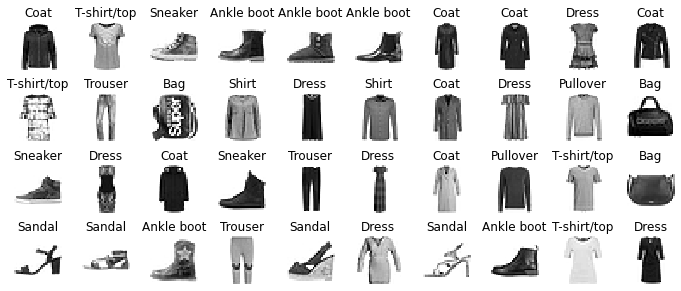

In [14]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Construct a Model

In [15]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [16]:
keras.backend.clear_session()
np.random.seed(42)

### or using the folowing method

In [17]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [18]:
model.layers

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [20]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [21]:
#keras.utils.plot_model(model, "my_mnist_model.png", show_shapes=True)

In [22]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [23]:
model.get_layer(hidden1.name) is hidden1

True

In [24]:
weights, biases = hidden1.get_weights()

In [25]:
weights

array([[ 0.02203132, -0.06798652, -0.00845861, ..., -0.00769566,
        -0.02479441,  0.02714273],
       [ 0.0150798 , -0.02127315,  0.05799924, ..., -0.02881185,
        -0.01737189, -0.02110712],
       [ 0.06264843,  0.05892386,  0.05906144, ..., -0.06236017,
        -0.05523596,  0.01698109],
       ...,
       [-0.04819538, -0.02817044, -0.0042744 , ..., -0.05889996,
         0.02650096,  0.03815081],
       [-0.05848898,  0.05507824, -0.03065011, ...,  0.05974005,
         0.06137851, -0.0597721 ],
       [ 0.06627403, -0.05594883, -0.05956815, ...,  0.00370681,
        -0.06469597,  0.00559049]], dtype=float32)

In [26]:
weights.shape

(784, 300)

In [27]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [28]:
biases.shape

(300,)

### Compile the Model
Here you can chose the loss function, the optimizer, the performance metric, etc. check Keras documentation for further details.

In [29]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

This is equivalent to:

```python
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
```

### Train the model
Here you can chose how many epochs you need and the batch size.

In [30]:
history = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))



Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.7199 - accuracy: 0.7642 - val_loss: 0.5394 - val_accuracy: 0.8172
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4898 - accuracy: 0.8309 - val_loss: 0.4616 - val_accuracy: 0.8432
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4455 - accuracy: 0.8443 - val_loss: 0.4300 - val_accuracy: 0.8524
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4165 - accuracy: 0.8547 - val_loss: 0.4179 - val_accuracy: 0.8564
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3959 - accuracy: 0.8605 - val_loss: 0.3797 - val_accuracy: 0.8698
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3795 - accuracy: 0.8668 - val_loss: 0.3885 - val_accuracy: 0.8644
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3655 - accuracy: 0.8703 - val_loss: 0.3742 - val_accuracy:

In [31]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [32]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [33]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Plot learning Curves

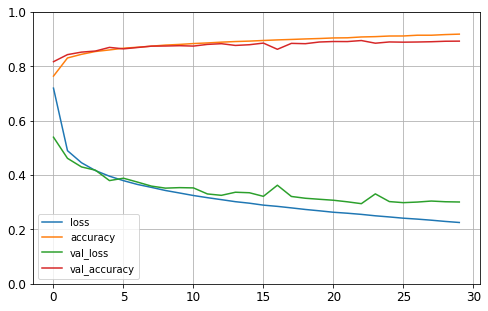

In [34]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [35]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3356 - accuracy: 0.8818


[0.33564040064811707, 0.8817999958992004]

In [36]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.02, 0.  , 0.97],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [37]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([9, 2, 1], dtype=int64)

In [38]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [39]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

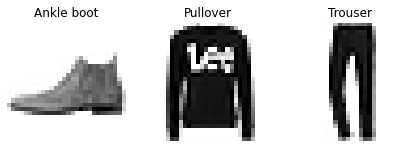

In [40]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Exercise

#### 1) Plot Learning curves when using different optimizers
#### 2) Plot Learning curves when using different batch size
#### 3) Plot Learning curves when using different number of epochs
#### 4) Add additional neurons and use Dropout Layer. Plot Learning curves.
#### 5) Use Batch Normalisation
#### 6) repeat with more layers
#### 7) apply on different datasets

## Compile the Model using different optimizers

In [41]:
'''
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
'''


model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Nadam(),
              metrics=["accuracy"])


'''
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adagrad",
              metrics=["accuracy"])
'''

'\nmodel.compile(loss="sparse_categorical_crossentropy",\n              optimizer="adagrad",\n              metrics=["accuracy"])\n'

### Train the model using different number of epochs and different batch size

In [42]:
'''
history = model.fit(X_train, y_train, batch_size=32, epochs=10,
                    validation_data=(X_valid, y_valid))                    
'''


history = model.fit(X_train, y_train, batch_size=48, epochs=40,
                    validation_data=(X_valid, y_valid))                    


'''
history = model.fit(X_train, y_train, batch_size=48, epochs=50,
                    validation_data=(X_valid, y_valid))                    
'''

Epoch 1/40
1146/1146 [==============================] - 8s 6ms/step - loss: 0.3423 - accuracy: 0.8753 - val_loss: 0.3606 - val_accuracy: 0.8686
Epoch 2/40
1146/1146 [==============================] - 7s 6ms/step - loss: 0.3091 - accuracy: 0.8869 - val_loss: 0.3570 - val_accuracy: 0.8682
Epoch 3/40
1146/1146 [==============================] - 8s 7ms/step - loss: 0.2845 - accuracy: 0.8945 - val_loss: 0.3168 - val_accuracy: 0.8842
Epoch 4/40
1146/1146 [==============================] - 8s 7ms/step - loss: 0.2691 - accuracy: 0.8995 - val_loss: 0.3067 - val_accuracy: 0.8876
Epoch 5/40
1146/1146 [==============================] - 65s 57ms/step - loss: 0.2521 - accuracy: 0.9045 - val_loss: 0.3051 - val_accuracy: 0.8900
Epoch 6/40
1146/1146 [==============================] - 8s 7ms/step - loss: 0.2433 - accuracy: 0.9083 - val_loss: 0.2910 - val_accuracy: 0.8964
Epoch 7/40
1146/1146 [==============================] - 8s 7ms/step - loss: 0.2311 - accuracy: 0.9133 - val_loss: 0.2817 - val_accurac

'\nhistory = model.fit(X_train, y_train, batch_size=48, epochs=50,\n                    validation_data=(X_valid, y_valid))                    \n'

## Plot learning curves

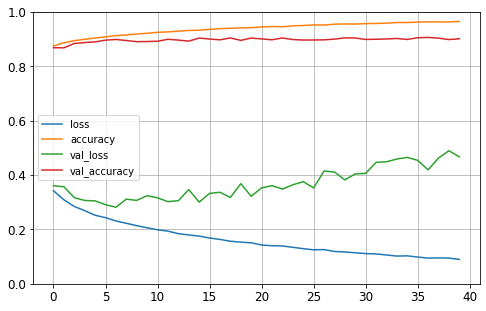

In [43]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# Add more layers

In [44]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

# Use adagrad optimizer

In [45]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adagrad",
              metrics=["accuracy"])

# Training the model

In [46]:
history = model.fit(X_train, y_train, batch_size=32, epochs=20,
                    validation_data=(X_valid, y_valid))


Epoch 1/20
1719/1719 [==============================] - 9s 5ms/step - loss: 1.1825 - accuracy: 0.6123 - val_loss: 0.7390 - val_accuracy: 0.7444
Epoch 2/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.6700 - accuracy: 0.7761 - val_loss: 0.6022 - val_accuracy: 0.8046
Epoch 3/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5754 - accuracy: 0.8087 - val_loss: 0.5403 - val_accuracy: 0.8216
Epoch 4/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5292 - accuracy: 0.8209 - val_loss: 0.5025 - val_accuracy: 0.8342
Epoch 5/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5008 - accuracy: 0.8291 - val_loss: 0.4869 - val_accuracy: 0.8374
Epoch 6/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4811 - accuracy: 0.8348 - val_loss: 0.4698 - val_accuracy: 0.8426
Epoch 7/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4661 - accuracy: 0.8391 - val_loss: 0.4536 - val_accuracy:

# Using batch normalization and dropout layer

In [47]:
from keras.layers import BatchNormalization
from keras.layers import Dropout

model.add(BatchNormalization())
model.add(Dropout(0.25))

# Plot learning curves

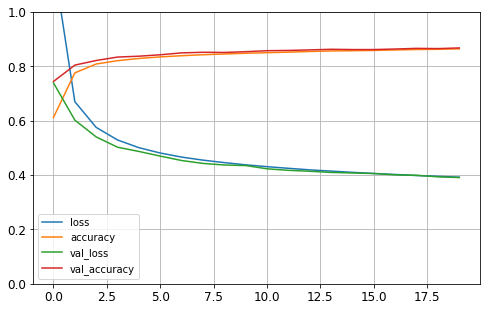

In [48]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()